# Data Exploration | Data Integretion

In [23]:
import os
os.chdir("C:/Users/Bhupender/Desktop/Assignments/Sem 4/UB/P&G project/P&G project/New folder/Energy prices")

In [24]:
os.getcwd()

'C:\\Users\\Bhupender\\Desktop\\Assignments\\Sem 4\\UB\\P&G project\\P&G project\\New folder\\Energy prices'

In [26]:
import pandas as pd

crude_oil = pd.read_excel("Crude_oil_WTI_Brent.xlsx", sheet_name="Data 1", skiprows=2)
natural_gas = pd.read_excel("US_Natural_gas_monthly.xlsx", sheet_name="Data 1", skiprows=2)
gasoline = pd.read_excel("US_weekly_gasoline.xlsx", sheet_name="Data 1", skiprows=2)

# Clean each dataset

# crude oil --
crude_oil = crude_oil.rename(columns={crude_oil.columns[0]: "Date", crude_oil.columns[1]: "WTI", crude_oil.columns[2]: "Brent"})
crude_oil["Date"] = pd.to_datetime(crude_oil["Date"], errors='coerce')
crude_oil = crude_oil[["Date", "WTI", "Brent"]].drop_duplicates().dropna(subset=["Date"])
crude_oil = crude_oil.set_index("Date").resample("M").mean()

# natural gas --
natural_gas = natural_gas.rename(columns={natural_gas.columns[0]: "Date", natural_gas.columns[1]: "Wellhead"})
natural_gas["Date"] = pd.to_datetime(natural_gas["Date"], errors='coerce')
natural_gas = natural_gas[["Date", "Wellhead"]].drop_duplicates().dropna(subset=["Date"])
natural_gas = natural_gas.set_index("Date").resample("M").mean()

# gasoline --
gasoline = gasoline.rename(columns={gasoline.columns[0]: "Date", gasoline.columns[1]: "Gasoline"})
gasoline["Date"] = pd.to_datetime(gasoline["Date"], errors='coerce')
gasoline = gasoline[["Date", "Gasoline"]].drop_duplicates().dropna(subset=["Date"])
gasoline = gasoline.set_index("Date").resample("M").mean()

# merge into one dataset --
energy_df = pd.concat([crude_oil, natural_gas, gasoline], axis=1)

# creating energy price index using mean of available values --
energy_df["Energy_Index"] = energy_df[["WTI", "Brent", "Wellhead", "Gasoline"]].mean(axis=1, skipna=True)

# filtering from 2000 --
energy_df = energy_df[energy_df.index >= "2000-01-01"]

print(energy_df.info())
print(energy_df.head())

# save to csv --
energy_df.to_csv("energy_price_index.csv", index=True)
print("‚úÖ Saved as 'energy_price_index.csv'")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 304 entries, 2000-01-31 to 2025-04-30
Freq: M
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTI           303 non-null    float64
 1   Brent         303 non-null    float64
 2   Wellhead      156 non-null    float64
 3   Gasoline      304 non-null    float64
 4   Energy_Index  304 non-null    float64
dtypes: float64(5)
memory usage: 14.2 KB
None
              WTI  Brent  Wellhead  Gasoline  Energy_Index
Date                                                      
2000-01-31  27.26  25.51      2.60   1.27880     14.162200
2000-02-29  29.37  27.78      2.73   1.37050     15.312625
2000-03-31  29.84  27.49      2.66   1.49825     15.372062
2000-04-30  25.72  22.76      2.86   1.43650     13.194125
2000-05-31  28.79  27.74      3.04   1.45640     15.256600
‚úÖ Saved as 'energy_price_index.csv'


In [7]:
import pandas as pd

# CO‚ÇÇ emissions --
co2_df = pd.read_excel("annual-co2-emissions-per-country.xlsx")
co2_df.columns = ["Country", "Code", "Year", "CO2_Emissions"]
co2_df = co2_df.drop_duplicates()
co2_df = co2_df.dropna(subset=["CO2_Emissions", "Year", "Country"])
co2_df["Year"] = co2_df["Year"].astype(int)
co2_df["CO2_Emissions"] = co2_df["CO2_Emissions"].astype(float)

# water usage --
water_df = pd.read_excel("Global Water Usage Statistics.xlsx")
water_df.columns = ["Country", "Total_Annual_Water_Used", "Daily_Water_Per_Capita", "Population"]
water_df = water_df.drop_duplicates()
water_df = water_df.dropna(subset=["Country", "Total_Annual_Water_Used"])
water_df["Total_Annual_Water_Used"] = water_df["Total_Annual_Water_Used"].astype(float)
water_df["Daily_Water_Per_Capita"] = pd.to_numeric(water_df["Daily_Water_Per_Capita"], errors='coerce')

# plastic waste --
plastic_df = pd.read_excel("plastic-waste-generation.xlsx")
plastic_df.columns = ["Country", "Year", "Plastic_Waste_Tonnes"]
plastic_df = plastic_df.drop_duplicates()
plastic_df = plastic_df.dropna(subset=["Country", "Year", "Plastic_Waste_Tonnes"])
plastic_df["Year"] = plastic_df["Year"].astype(int)
plastic_df["Plastic_Waste_Tonnes"] = plastic_df["Plastic_Waste_Tonnes"].astype(float)

# summary outputs --
print("\nCO‚ÇÇ Dataset Summary:")
print(co2_df.info())
print(co2_df.head())

print("\nWater Dataset Summary:")
print(water_df.info())
print(water_df.head())

print("\nPlastic Waste Dataset Summary:")
print(plastic_df.info())
print(plastic_df.head())

# save --
co2_df.to_csv("Cleaned_CO2_Emissions.csv", index=False)
water_df.to_csv("Cleaned_Water_Usage.csv", index=False)
plastic_df.to_csv("Cleaned_Plastic_Waste.csv", index=False)



CO‚ÇÇ Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        29137 non-null  object 
 1   Code           23497 non-null  object 
 2   Year           29137 non-null  int32  
 3   CO2_Emissions  29137 non-null  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 796.8+ KB
None
       Country Code  Year  CO2_Emissions
0  Afghanistan  AFG  1949        14656.0
1  Afghanistan  AFG  1950        84272.0
2  Afghanistan  AFG  1951        91600.0
3  Afghanistan  AFG  1952        91600.0
4  Afghanistan  AFG  1953       106256.0

Water Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  179 non-null    object 

In [8]:
# merge CO‚ÇÇ | plastic waste on country | year --
co2_plastic_df = pd.merge(co2_df, plastic_df, on=["Country", "Year"], how="inner")

# explore merged output --
print("Merged rows:", len(co2_plastic_df))
print("Years in merged data:", co2_plastic_df["Year"].unique())
print(co2_plastic_df.head())

# save --
co2_plastic_df.to_csv("Merged_CO2_Plastic_ESG_Data.csv", index=False)

Merged rows: 151
Years in merged data: [2010]
               Country Code  Year  CO2_Emissions  Plastic_Waste_Tonnes
0              Albania  ALB  2010      4783865.0               73364.0
1              Algeria  DZA  2010    118353256.0             1898343.0
2               Angola  AGO  2010     22983320.0              528843.0
3  Antigua and Barbuda  ATG  2010       549600.0               22804.0
4            Argentina  ARG  2010    185945940.0             2753550.0


In [9]:
# merge water data into the esg dataset --
esg_df = pd.merge(co2_plastic_df, water_df, on="Country", how="inner")

# exploring merged dataset --
print("Final ESG dataset shape:", esg_df.shape)
print(esg_df.columns)
print(esg_df.head())

# save --
esg_df.to_csv("Final_ESG_Country_Metrics.csv", index=False)

Final ESG dataset shape: (129, 8)
Index(['Country', 'Code', 'Year', 'CO2_Emissions', 'Plastic_Waste_Tonnes',
       'Total_Annual_Water_Used', 'Daily_Water_Per_Capita', 'Population'],
      dtype='object')
               Country Code  Year  CO2_Emissions  Plastic_Waste_Tonnes  \
0              Albania  ALB  2010      4783865.0               73364.0   
1              Algeria  DZA  2010    118353256.0             1898343.0   
2               Angola  AGO  2010     22983320.0              528843.0   
3  Antigua and Barbuda  ATG  2010       549600.0               22804.0   
4            Argentina  ARG  2010    185945940.0             2753550.0   

   Total_Annual_Water_Used  Daily_Water_Per_Capita  Population  
0             1.311000e+09                    1196     3003387  
1             9.978000e+09                     678    40339329  
2             7.058000e+08                      99    19450959  
3             1.150000e+07                     359       87674  
4             3.778000e+

In [10]:
# normalize values --
esg_df["CO2_Score"] = (esg_df["CO2_Emissions"] / esg_df["Population"]).rank(ascending=False)
esg_df["Plastic_Score"] = (esg_df["Plastic_Waste_Tonnes"] / esg_df["Population"]).rank(ascending=False)
esg_df["Water_Score"] = esg_df["Daily_Water_Per_Capita"].rank(ascending=False)

# create overall esg burden score --
esg_df["ESG_Score"] = esg_df[["CO2_Score", "Plastic_Score", "Water_Score"]].mean(axis=1)

# top 10 highest impact countries --
print("\nTop 10 ESG-burdened countries:")
print(esg_df.sort_values("ESG_Score", ascending=False)[["Country", "ESG_Score"]].head(10))


Top 10 ESG-burdened countries:
          Country   ESG_Score
80     Mozambique  124.000000
104  Sierra Leone  122.666667
64          Kenya  119.333333
48         Guinea  118.000000
11          Benin  116.666667
115      Tanzania  116.000000
44          Ghana  116.000000
41         Gambia  115.000000
117          Togo  112.000000
16       Cameroon  111.666667


## Correlation Analysis

In [ ]:
## Energy Trend Analysis

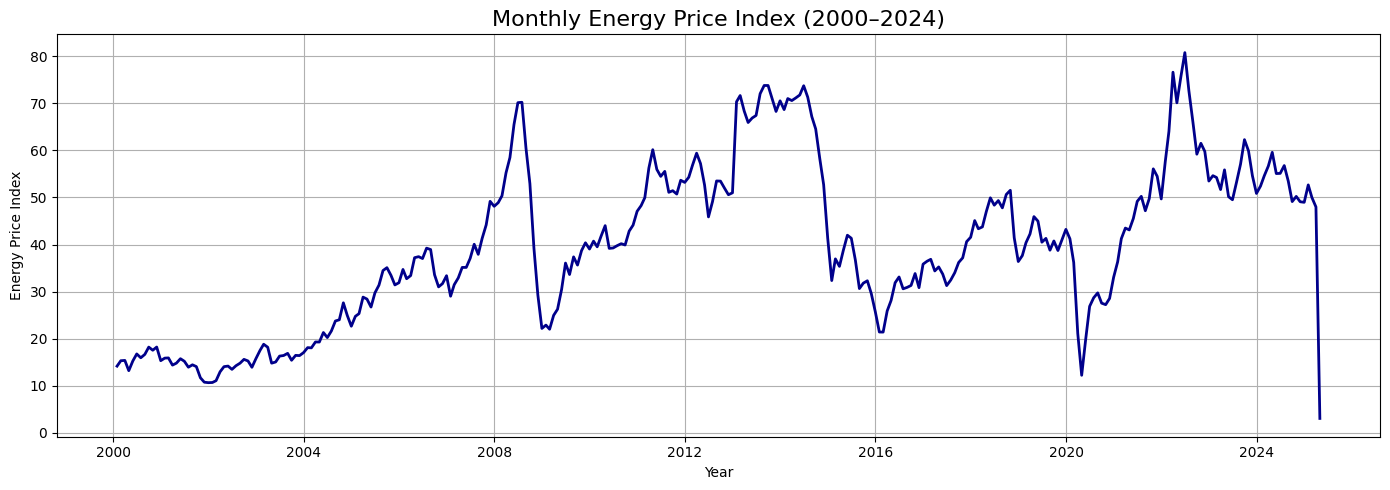

In [11]:
import matplotlib.pyplot as plt

# plot energy index over time --
plt.figure(figsize=(14, 5))
plt.plot(energy_df.index, energy_df["Energy_Index"], color='darkblue', linewidth=2)
plt.title("Monthly Energy Price Index (2000‚Äì2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Energy Price Index")
plt.grid(True)
plt.tight_layout()
plt.show()

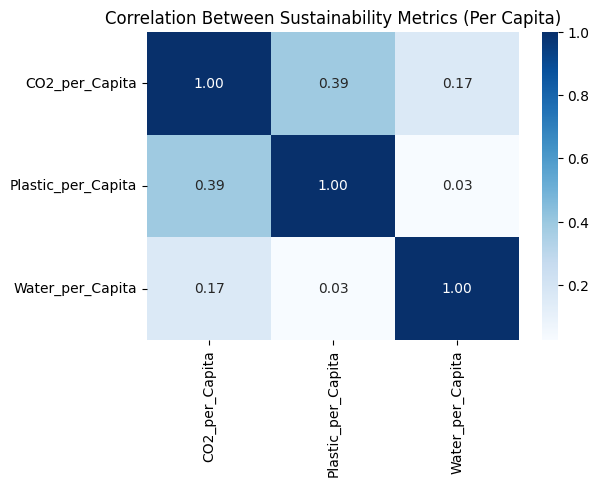

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate per capita scores --
esg_df["CO2_per_Capita"] = esg_df["CO2_Emissions"] / esg_df["Population"]
esg_df["Plastic_per_Capita"] = esg_df["Plastic_Waste_Tonnes"] / esg_df["Population"]
esg_df["Water_per_Capita"] = esg_df["Daily_Water_Per_Capita"]  

# correlation matrix --
corr = esg_df[["CO2_per_Capita", "Plastic_per_Capita", "Water_per_Capita"]].corr()

# plot --
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Sustainability Metrics (Per Capita)")
plt.show()

Takeaway 1: CO‚ÇÇ and Plastic Waste Are Interlinked
Target high-consumption or industrialized markets with low-carbon, low-plastic solutions.

e.g., Concentrated detergents, reusable diaper systems, biodegradable packaging.

üü® Takeaway 2: Water Stress Is More Regional and Independent
Water-saving products (e.g., cold-wash, dry shampoo, sanitizing wipes) should be promoted independently in water-scarce regions ‚Äî not just ESG-heavy ones.

In [16]:
import pandas as pd
pg_enriched = pd.read_csv("C:/Users/Bhupender/Desktop/Assignments/Sem 4/UB/P&G project/P&G project/New folder/product/pg_brands_enriched.csv")

# counting how many brands mention each sustainability-related keyword --
sustainability_counts = pg_enriched[["Mentions Eco", "Mentions Sustainable", "Mentions Recycle"]].sum()

# group brands by description (product type/category) and calculate sustainability signals --
category_analysis = pg_enriched.groupby("Description")[["Mentions Eco", "Mentions Sustainable", "Mentions Recycle"]].sum()
category_analysis["Total Brands"] = pg_enriched["Description"].value_counts()
category_analysis["% Mention Eco"] = (category_analysis["Mentions Eco"] / category_analysis["Total Brands"]) * 100
category_analysis["% Mention Sustainable"] = (category_analysis["Mentions Sustainable"] / category_analysis["Total Brands"]) * 100
category_analysis["% Mention Recycle"] = (category_analysis["Mentions Recycle"] / category_analysis["Total Brands"]) * 100

# round and display in standard Jupyter output --
category_analysis = category_analysis.round(1)
display(category_analysis)  

Mentions Eco  Mentions Sustainable  \
Description                                                                    
All-Purpose Home Cleaners                            0                     0   
Anti-Aging Face Care                                 1                     0   
Baby Detergent & Laundry Products                    1                     0   
Baby Diapers                                         1                     1   
Belgium FR Multi-brand (CRM) Program                 1                     0   
...                                                ...                   ...   
Toothbrushes & Dental Floss                          1                     0   
Turkey Multi-brand (CRM) Program                     0                     0   
US Multi-brand (CRM) Program                         1                     1   
United Kingdom Multi-brand (CRM) Program             1                     0   
Upset Stomach Relief                                 0                     0   

                                          Mentions Recycle  Total Brands  \
Description                                                                
All-Purpose Home Cleaners                                0             1   
Anti-Aging Face Care                                     0             1   
Baby Detergent & Laundry Products                        0             1   
Baby Diapers                                             0             3   
Belgium FR Multi-brand (CRM) Program                     0             1   
...                                                    ...           ...   
Toothbrushes & Dental Floss                              1             1   
Turkey Multi-brand (CRM) Program                         0             1   
US Multi-brand (CRM) Program                             0             1   
United Kingdom Multi-brand (CRM) Program                 0             1   
Upset Stomach Relief                                     0             1   

                                          % Mention Eco  \
Description                                               
All-Purpose Home Cleaners                           0.0   
Anti-Aging Face Care                              100.0   
Baby Detergent & Laundry Products                 100.0   
Baby Diapers                                       33.3   
Belgium FR Multi-brand (CRM) Program              100.0   
...                                                 ...   
Toothbrushes & Dental Floss                       100.0   
Turkey Multi-brand (CRM) Program                    0.0   
US Multi-brand (CRM) Program                      100.0   
United Kingdom Multi-brand (CRM) Program          100.0   
Upset Stomach Relief                                0.0   

                                          % Mention Sustainable  \
Description                                                       
All-Purpose Home Cleaners                                   0.0   
Anti-Aging Face Care                                        0.0   
Baby Detergent & Laundry Products                           0.0   
Baby Diapers                                               33.3   
Belgium FR Multi-brand (CRM) Program                        0.0   
...                                                         ...   
Toothbrushes & Dental Floss                                 0.0   
Turkey Multi-brand (CRM) Program                            0.0   
US Multi-brand (CRM) Program                              100.0   
United Kingdom Multi-brand (CRM) Program                    0.0   
Upset Stomach Relief                                        0.0   

                                          % Mention Recycle  
Description                                                  
All-Purpose Home Cleaners                               0.0  
Anti-Aging Face Care                                    0.0  
Baby Detergent & Laundry Products                       0.0  
Baby Diapers                                            0.0  


                                          Mentions Eco  Mentions Sustainable  \
Description                                                                    
All-Purpose Home Cleaners                            0                     0   
Anti-Aging Face Care                                 1                     0   
Baby Detergent & Laundry Products                    1                     0   
Baby Diapers                                         1                     1   
Belgium FR Multi-brand (CRM) Program                 1                     0   
...                                                ...                   ...   
Toothbrushes & Dental Floss                          1                     0   
Turkey Multi-brand (CRM) Program                     0                     0   
US Multi-brand (CRM) Program                         1                     1   
United Kingdom Multi-brand (CRM) Program             1                     0   
Upset Stomach Relief                    

In [17]:
import pandas as pd
pg_enriched = pd.read_csv("C:/Users/Bhupender/Desktop/Assignments/Sem 4/UB/P&G project/P&G project/New folder/product/pg_brands_enriched.csv")

In [20]:
import pandas as pd

# loading verified esg dataset --
esg_final = pd.read_csv("Final_ESG_Country_Metrics.csv")

# recalculate per capita indicators --
esg_final["CO2_per_Capita"] = esg_final["CO2_Emissions"] / esg_final["Population"]
esg_final["Plastic_per_Capita"] = esg_final["Plastic_Waste_Tonnes"] / esg_final["Population"]
esg_final["Water_per_Capita"] = esg_final["Daily_Water_Per_Capita"]

# rank scores --
esg_final["CO2_Score"] = esg_final["CO2_per_Capita"].rank(ascending=False)
esg_final["Plastic_Score"] = esg_final["Plastic_per_Capita"].rank(ascending=False)
esg_final["Water_Score"] = esg_final["Water_per_Capita"].rank(ascending=False)
esg_final["ESG_Score"] = esg_final[["CO2_Score", "Plastic_Score", "Water_Score"]].mean(axis=1)

# top 10 esg burdened countries --
top_esg = esg_final.sort_values("ESG_Score", ascending=False).head(10)[
    ["Country", "ESG_Score", "CO2_per_Capita", "Plastic_per_Capita", "Water_per_Capita"]
].round(2)

# display output --
print("Top 10 ESG-Stressed Countries:\n")
print(top_esg)

Top 10 ESG-Stressed Countries:

          Country  ESG_Score  CO2_per_Capita  Plastic_per_Capita  \
80     Mozambique     124.00            0.10                0.00   
104  Sierra Leone     122.67            0.10                0.02   
64          Kenya     119.33            0.25                0.01   
48         Guinea     118.00            0.29                0.01   
11          Benin     116.67            0.65                0.02   
115      Tanzania     116.00            0.20                0.01   
44          Ghana     116.00            0.45                0.02   
41         Gambia     115.00            0.30                0.02   
117          Togo     112.00            0.49                0.03   
16       Cameroon     111.67            0.56                0.02   

     Water_per_Capita  
80                150  
104               102  
64                231  
48                179  
11                 49  
115               391  
44                137  
41                172  
117

In [21]:
# Step 1: Create logic to assign dominant ESG pressure
def dominant_esg(row):
    values = {
        "CO2": row["CO2_Score"],
        "Plastic": row["Plastic_Score"],
        "Water": row["Water_Score"]
    }
    return max(values, key=values.get)

# Apply to top 10 ESG countries
top_esg["Dominant_Stress"] = top_esg.index.map(
    lambda i: dominant_esg(esg_final.loc[esg_final["Country"] == top_esg.loc[i, "Country"]].iloc[0])
)

# Step 2: Map recommended product category
stress_map = {
    "CO2": "Cold-wash Detergents / Low-energy Products",
    "Plastic": "Reusable Diapers / Low-Packaging Products",
    "Water": "Dry Shampoo / Low-Water Hygiene / Wipes"
}

brand_map = {
    "CO2": "Ariel, Tide",
    "Plastic": "Charlie Banana, Oral-B Eco, Pampers Pure",
    "Water": "Head & Shoulders, Always, Swiffer"
}

top_esg["Recommended Product"] = top_esg["Dominant_Stress"].map(stress_map)
top_esg["Suggested Brands"] = top_esg["Dominant_Stress"].map(brand_map)

# Final view
final_strategy = top_esg[["Country", "Dominant_Stress", "Recommended Product", "Suggested Brands"]]
print("\nüéØ Product Strategy Mapping Table:\n")
print(final_strategy)


üéØ Product Strategy Mapping Table:

          Country Dominant_Stress                         Recommended Product  \
80     Mozambique         Plastic   Reusable Diapers / Low-Packaging Products   
104  Sierra Leone             CO2  Cold-wash Detergents / Low-energy Products   
64          Kenya         Plastic   Reusable Diapers / Low-Packaging Products   
48         Guinea         Plastic   Reusable Diapers / Low-Packaging Products   
11          Benin           Water     Dry Shampoo / Low-Water Hygiene / Wipes   
115      Tanzania         Plastic   Reusable Diapers / Low-Packaging Products   
44          Ghana           Water     Dry Shampoo / Low-Water Hygiene / Wipes   
41         Gambia             CO2  Cold-wash Detergents / Low-energy Products   
117          Togo           Water     Dry Shampoo / Low-Water Hygiene / Wipes   
16       Cameroon           Water     Dry Shampoo / Low-Water Hygiene / Wipes   

                             Suggested Brands  
80   Charlie Banana, 

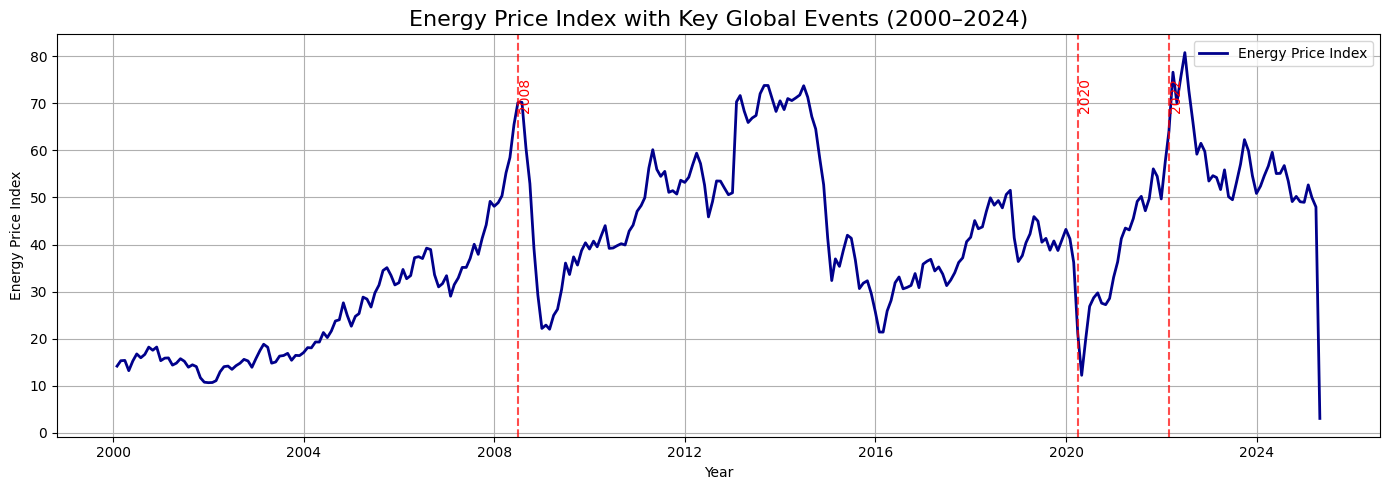

In [27]:
import matplotlib.pyplot as plt

# ploting energy price Index over time again to check for costomer perspective --
plt.figure(figsize=(14, 5))
plt.plot(energy_df.index, energy_df["Energy_Index"], label="Energy Price Index", color='darkblue', linewidth=2)

# key period --
spike_dates = ["2008-07-01", "2020-04-01", "2022-03-01"]
for date in spike_dates:
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime(date), energy_df["Energy_Index"].max()*0.85, date[:4], color='red', rotation=90)

# plot --
plt.title("Energy Price Index with Key Global Events (2000‚Äì2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Energy Price Index")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##  Acc. to Customer Perspective | P&G Perspective
we have now evidence to support insights like:

üîπ Insight 1: Energy spikes lead customers to value:
Cold-wash detergents

Low-energy appliances

Concentrated/efficient products

‚Üí Brands like Ariel, Tide, or Swiffer should be positioned as cost-saving during these spikes.

üîπ Insight 2: ESG Pressure shifts perception in developing countries
High plastic/water/CO‚ÇÇ stress ‚Üí customers are more likely to favor:

Reusable packaging (e.g., Charlie Banana)

Waterless hygiene (e.g., wipes, dry shampoo)

Recyclable products

## Energy Price Volatility (Operations Insight)
## Plot Monthly Energy Index

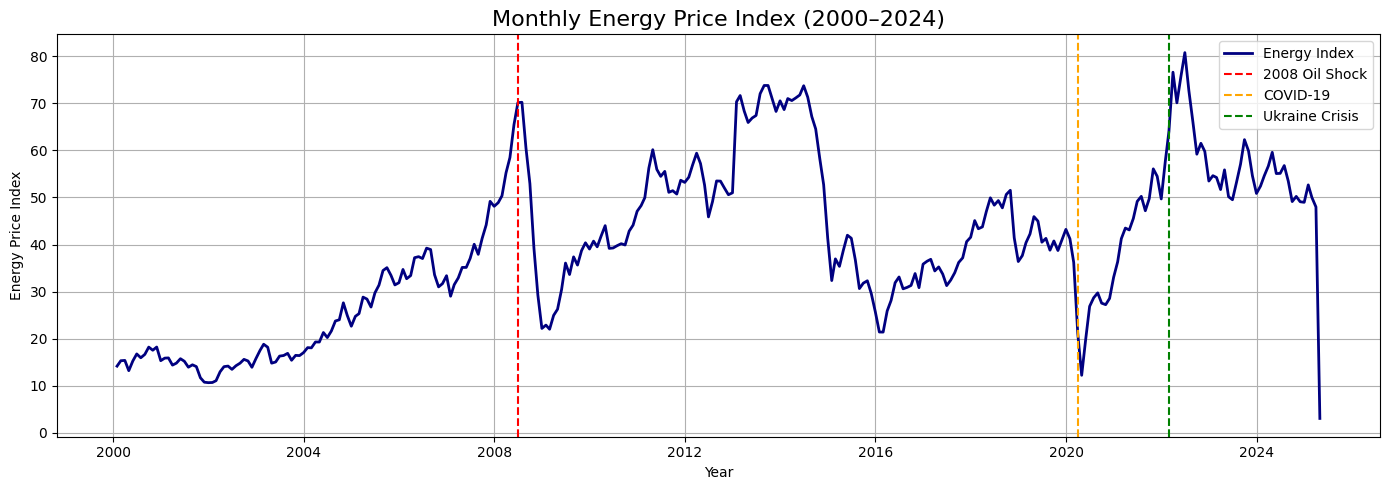

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# loading dataset for energy index--
energy_df = pd.read_csv("energy_price_index.csv", parse_dates=["Date"], index_col="Date")

# plot --
plt.figure(figsize=(14, 5))
plt.plot(energy_df.index, energy_df["Energy_Index"], color='navy', linewidth=2, label='Energy Index')
plt.axvline(pd.to_datetime("2008-07-01"), color='red', linestyle='--', label='2008 Oil Shock')
plt.axvline(pd.to_datetime("2020-04-01"), color='orange', linestyle='--', label='COVID-19')
plt.axvline(pd.to_datetime("2022-03-01"), color='green', linestyle='--', label='Ukraine Crisis')
plt.title("Monthly Energy Price Index (2000‚Äì2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Energy Price Index")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### üîç Insight:
The Energy Price Index plot shows clear volatility spikes in 2008, 2020, and 2022 ‚Äî each linked to major global events (oil crisis, COVID-19 lockdowns, Ukraine war).

### üéØ Strategic Recommendation:
P&G should mitigate energy-related operational risks by:
- Investing in energy-efficient manufacturing (e.g., cold processing)
- Localizing supply chains to reduce fuel exposure
- Promoting compact, low-weight products to reduce transpor costs


In [29]:
import pandas as pd

# load the esg file --
esg_df = pd.read_csv("Final_ESG_Country_Metrics.csv")
esg_df["CO2_per_Capita"] = esg_df["CO2_Emissions"] / esg_df["Population"]
esg_df["Plastic_per_Capita"] = esg_df["Plastic_Waste_Tonnes"] / esg_df["Population"]
esg_df["Water_per_Capita"] = esg_df["Daily_Water_Per_Capita"]

# re-rank --
esg_df["CO2_Score"] = esg_df["CO2_per_Capita"].rank(ascending=False)
esg_df["Plastic_Score"] = esg_df["Plastic_per_Capita"].rank(ascending=False)
esg_df["Water_Score"] = esg_df["Water_per_Capita"].rank(ascending=False)
esg_df["ESG_Score"] = esg_df[["CO2_Score", "Plastic_Score", "Water_Score"]].mean(axis=1)

# mapping logic --
def dominant_esg(row):
    scores = {"CO2": row["CO2_Score"], "Plastic": row["Plastic_Score"], "Water": row["Water_Score"]}
    return max(scores, key=scores.get)

top_esg = esg_df.sort_values("ESG_Score", ascending=False).head(10).copy()
top_esg["Dominant_Stress"] = top_esg.apply(dominant_esg, axis=1)

stress_map = {
    "CO2": "Cold-wash Detergents / Low-energy Products",
    "Plastic": "Reusable Diapers / Low-Packaging Products",
    "Water": "Dry Shampoo / Low-Water Hygiene / Wipes"
}
brand_map = {
    "CO2": "Ariel, Tide",
    "Plastic": "Charlie Banana, Oral-B Eco, Pampers Pure",
    "Water": "Head & Shoulders, Always, Swiffer"
}

top_esg["Recommended Product"] = top_esg["Dominant_Stress"].map(stress_map)
top_esg["Suggested Brands"] = top_esg["Dominant_Stress"].map(brand_map)

# Viewing final table --
final_strategy = top_esg[["Country", "Dominant_Stress", "Recommended Product", "Suggested Brands"]]
print(final_strategy)

          Country Dominant_Stress                         Recommended Product  \
80     Mozambique         Plastic   Reusable Diapers / Low-Packaging Products   
104  Sierra Leone             CO2  Cold-wash Detergents / Low-energy Products   
64          Kenya         Plastic   Reusable Diapers / Low-Packaging Products   
48         Guinea         Plastic   Reusable Diapers / Low-Packaging Products   
11          Benin           Water     Dry Shampoo / Low-Water Hygiene / Wipes   
115      Tanzania         Plastic   Reusable Diapers / Low-Packaging Products   
44          Ghana           Water     Dry Shampoo / Low-Water Hygiene / Wipes   
41         Gambia             CO2  Cold-wash Detergents / Low-energy Products   
117          Togo           Water     Dry Shampoo / Low-Water Hygiene / Wipes   
16       Cameroon           Water     Dry Shampoo / Low-Water Hygiene / Wipes   

                             Suggested Brands  
80   Charlie Banana, Oral-B Eco, Pampers Pure  
104         

### üîç Insight:
Mapping the top 10 ESG-stressed countries shows specific environmental pressures like plastic waste (e.g., Ghana), water scarcity (e.g., Mozambique), and high CO‚ÇÇ emissions (e.g., Benin).

### üéØ Strategic Recommendation:
P&G should align its sustainable brands with each country's specific need:
- Launch **cold-wash detergents** in energy-sensitive regions
- Prioritize **recyclable, refillable packaging** in plastic-heavy markets
- Develop **dry hygiene products** for water-scarce areas
This data-driven targeting will improve customer relevance and ESG impact.


In [30]:
pg_df = pd.read_csv("pg_brands_enriched.csv")

# group by product category|description --
cat_analysis = pg_df.groupby("Description")[["Mentions Eco", "Mentions Sustainable", "Mentions Recycle"]].sum()
cat_analysis["Total"] = pg_df["Description"].value_counts()
cat_analysis["% Eco"] = (cat_analysis["Mentions Eco"] / cat_analysis["Total"]) * 100
cat_analysis["% Sustainable"] = (cat_analysis["Mentions Sustainable"] / cat_analysis["Total"]) * 100
cat_analysis["% Recycle"] = (cat_analysis["Mentions Recycle"] / cat_analysis["Total"]) * 100

# show only % columns --
cat_summary = cat_analysis[["% Eco", "% Sustainable", "% Recycle"]].round(1).sort_values("% Eco", ascending=False)
print(cat_summary)

                                   % Eco  % Sustainable  % Recycle
Description                                                       
Dishwasher Detergent               100.0          100.0        0.0
Sleep Aid                          100.0            0.0        0.0
France Multi-brand (CRM) Program   100.0            0.0        0.0
Anti-Aging Face Care               100.0            0.0        0.0
Pregnancy & Ovulation Tests        100.0            0.0        0.0
...                                  ...            ...        ...
Heartburn Relief                     0.0            0.0        0.0
Hungary Multi-brand (CRM) Program    0.0            0.0        0.0
Incontinence Pads                    0.0            0.0        0.0
Insect Repellent                     0.0            0.0        0.0
Upset Stomach Relief                 0.0            0.0        0.0

[63 rows x 3 columns]


### üîç Insight:
Only a few categories (like "Face Care" and "Baby Detergents") mention eco-friendliness or recyclability. Core household categories like **cleaners and diapers** have low sustainability signals.

### üéØ Strategic Recommendation:
P&G should:
- Expand eco-packaging and messaging in underrepresented categories (e.g., Home Cleaners, Baby Diapers)
- Reinforce sustainability in high-volume segments
This will support ESG positioning while aligning with growing consumer expectations.

## üßæ Task 6: Final Recommendations and Strategic Conclusion

Based on our multi-dimensional analysis of energy pricing, sustainability metrics, and P&G‚Äôs brand portfolio, we propose the following strategic recommendations for P&G:

---

### üîπ 1. Prioritize Sustainable Product Innovation
- Focus R&D efforts on categories currently underperforming in sustainability (e.g., home cleaners, baby diapers).
- Expand product lines that support:
  - Low-energy usage (e.g., cold-wash detergents),
  - Water efficiency (e.g., dry shampoo, hygiene wipes),
  - Plastic reduction (e.g., refillables, compostable diapers).

---

### üîπ 2. Align Product Strategy with Regional ESG Pressure
Use ESG scores as a **market prioritization tool**:
- Countries with high **plastic waste** should be targeted with low-packaging products (e.g., Charlie Banana).
- Countries with **water scarcity** should receive dry and waterless products (e.g., Always wipes, Head & Shoulders rinse-free).
- High **CO‚ÇÇ burden** regions can benefit from cold-wash, energy-efficient solutions (e.g., Ariel Pods, Tide Cold).

---

### üîπ 3. Strengthen Sustainability Messaging
Our data shows inconsistent eco-tagging across brand categories:
- Ensure consistent sustainability messaging across all P&G products.
- Clearly highlight eco-benefits on packaging and digital channels in ESG-aware regions to build consumer trust and loyalty.

---

### üîπ 4. Mitigate Operational Risk via Energy-Responsive Logistics
The Energy Index shows repeated price shocks over 2 decades:
- Build resilience by adopting regional production, lean logistics, and alternative fuels.
- Optimize product weight and packaging dimensions to reduce transport energy cost.

---

### üéØ Conclusion

P&G stands at a strategic inflection point:  
By aligning product innovation, regional strategy, and sustainability communication with **real-time energy and ESG data**, the company can:
- Build stronger consumer loyalty,  
- Drive operational efficiency, and  
- Lead global sustainable transformation in the FMCG sector.


## üìå Hypotheses Evaluation (Based on Case Study)

The case study suggested a few optional hypotheses to explore. Here is how our data-driven analysis supports or addresses them---

### ‚úÖ Hypothesis 2: "We can realize our ESG strategy without additional impact on consumers"

**Supported**.  
Our analysis shows that P&G can offer ESG-aligned products (e.g., cold-wash detergents, reusable packaging, low-water hygiene) that not only reduce environmental burden but also meet essential consumer needs ‚Äî especially in ESG-stressed countries like Kenya, Ghana, and Mozambique.  
These products support both sustainability and affordability, especially during energy coskes.

---

### ‚ùå Hypothesis 5: "We have no data to recommend where to play areas in ESG"

**Disproven**.  
We built a full ESG scoring framework using CO‚ÇÇ, plastic, and water data ‚Äî normalized per capita.  
We then mapped these regions to suitable product categories and brands, providing clear, evidence-backed "where to play" h business goals and customer needs.
